# Project - Amazon food review sentiment analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from wordcloud import STOPWORDS

from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten,SimpleRNN,Bidirectional,LSTM,GRU,Dropout

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("food_review.csv")

## EDA

In [3]:
df

,Unnamed: 0,Text,Score
0,0,I bought these from a large chain pet store. a...,1
1,1,"This soup is incredibly good! But honestly, I...",5
2,2,Our family loves these tasty and healthy sesam...,5
3,3,The local auto shop offers this free to it cus...,4
4,4,I brought 2 bottles. One I carry in my pocket...,5
...,...,...,...
40495,40495,This is the second Beaba freezer tray that we'...,5
40496,40496,"The other, 5-star, review, must be from a shil...",1
40497,40497,Perfect for pills and capsules for medications...,5
40498,40498,"Sure, the first ingredient on this cereal is w...",2


In [4]:
df.head()

,Unnamed: 0,Text,Score
0,0,I bought these from a large chain pet store. a...,1
1,1,"This soup is incredibly good! But honestly, I...",5
2,2,Our family loves these tasty and healthy sesam...,5
3,3,The local auto shop offers this free to it cus...,4
4,4,I brought 2 bottles. One I carry in my pocket...,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  40500 non-null  int64 
 1   Text        40500 non-null  object
 2   Score       40500 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 949.3+ KB


In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df.isnull().sum()

Text     0
Score    0
dtype: int64

In [8]:
df.shape

(40500, 2)

In [9]:
df.Text.head()

0    I bought these from a large chain pet store. a...
1    This soup is incredibly good!  But honestly, I...
2    Our family loves these tasty and healthy sesam...
3    The local auto shop offers this free to it cus...
4    I brought 2 bottles.  One I carry in my pocket...
Name: Text, dtype: object

In [10]:
df.describe()

,Score
count,40500.000000
mean,3.001877
std,1.413811
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [11]:
df["Score"].value_counts()

4    8117
5    8106
3    8103
2    8095
1    8079
Name: Score, dtype: int64

In [12]:
#Finding the special characters in the data frame 
df.isin(['?']).sum(axis=0)

Text     0
Score    0
dtype: int64

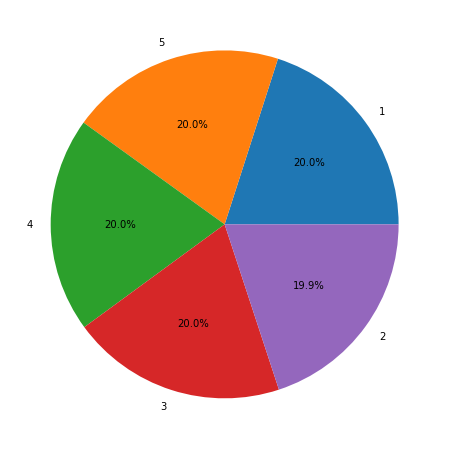

In [13]:
plt.figure(figsize=(8,8))
plt.pie(df['Score'].value_counts(),labels=df['Score'].unique(),autopct="%.1f%%")
plt.show()

# Based on the above chart we can conclude that the data is not imbalanced

# WordCloud

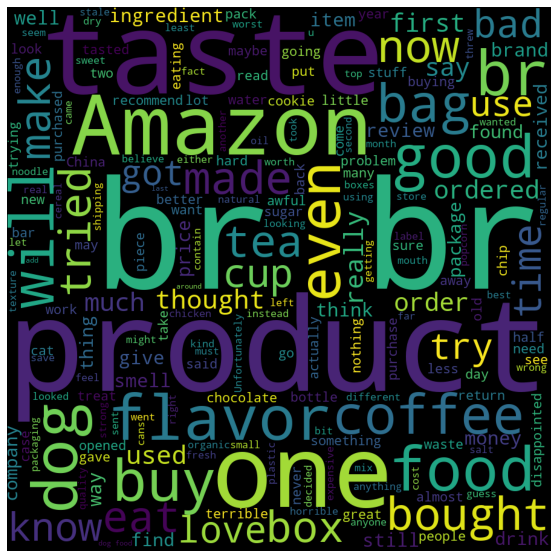

In [14]:
#Label 1
wc = WordCloud(width = 900, 
               height = 900, 
               background_color ='black',  
               min_font_size = 8)

wc.generate(''.join(df[df["Score"]==1]["Text"]))

plt.figure(figsize = (10,10)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()


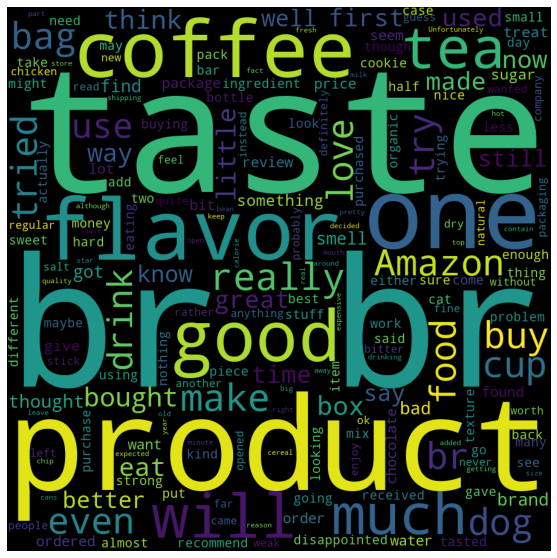

In [15]:
#Label 2
wc = WordCloud(width = 900, 
               height = 900, 
               background_color ='black',  
               min_font_size = 8)

wc.generate(''.join(df[df["Score"]==2]["Text"]))

plt.figure(figsize = (10,10)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

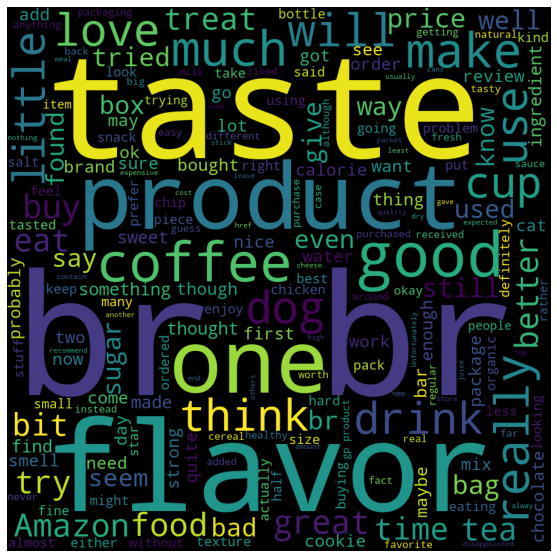

In [16]:
#Label 3
wc = WordCloud(width = 900, 
               height = 900, 
               background_color ='black',  
               min_font_size = 8)

wc.generate(''.join(df[df["Score"]==3]["Text"]))

plt.figure(figsize = (10,10)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

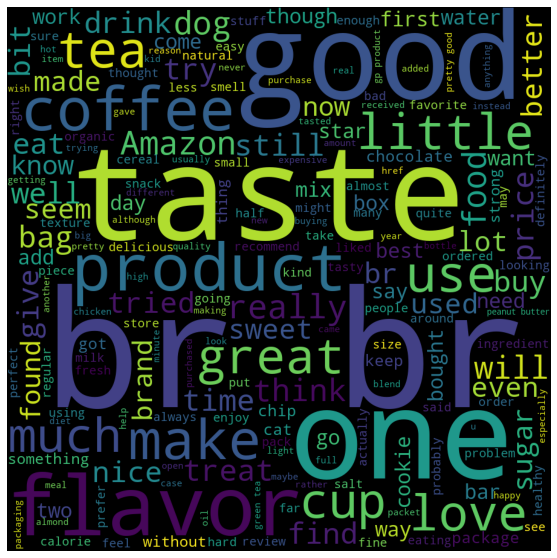

In [17]:
#Label 4
wc = WordCloud(width = 900, 
               height = 900, 
               background_color ='black',  
               min_font_size = 8)

wc.generate(''.join(df[df["Score"]==4]["Text"]))

plt.figure(figsize = (10,10)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

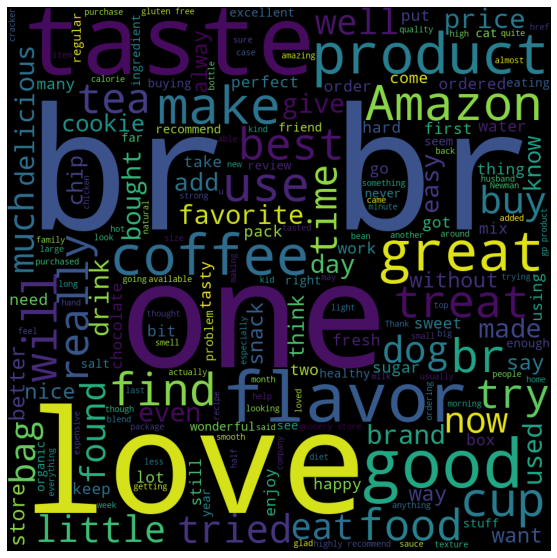

In [18]:
#Label 5
wc = WordCloud(width = 900, 
               height = 900, 
               background_color ='black',  
               min_font_size = 8)

wc.generate(''.join(df[df["Score"]==5]["Text"]))

plt.figure(figsize = (10,10)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [19]:
scores = df['Score']
df['Score'] = df['Score'].apply(lambda x : 'positive' if x > 3 else 'negative')

In [20]:
df.groupby('Score')['Text'].count()

Score
negative    24277
positive    16223
Name: Text, dtype: int64

<AxesSubplot:title={'center':'Label Distribution'}, xlabel='Score'>

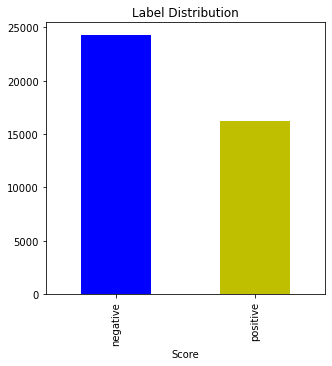

In [21]:
df.groupby('Score')['Text'].count().plot(kind='bar',color=['b','y'],title='Label Distribution',figsize=(5,5))

# Data Distribution in Positive or Negative label Score, hear negative score is 24000 or positive is 18000.

In [22]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for
x in x.split()))

In [23]:
df['Text'] = df['Text'].str.replace('[^\w\s]', "")
df.Text

0        i bought these from a large chain pet store af...
1        this soup is incredibly good but honestly i wa...
2        our family loves these tasty and healthy sesam...
3        the local auto shop offers this free to it cus...
4        i brought 2 bottles one i carry in my pocket a...
                               ...                        
40495    this is the second beaba freezer tray that wev...
40496    the other 5star review must be from a shill wh...
40497    perfect for pills and capsules for medications...
40498    sure the first ingredient on this cereal is wh...
40499    i waited long and with bated breath for amazon...
Name: Text, Length: 40500, dtype: object

# Remove the Stopwords

In [24]:
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df.Text.head()

0    bought large chain pet store reading reviews c...
1    soup incredibly good honestly looking better d...
2    family loves tasty healthy sesame honey almond...
3    local auto shop offers free customers ive trie...
4    brought 2 bottles one carry pocket home fell l...
Name: Text, dtype: object

# Lemmatization

In [25]:
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).
lemmatize() for word in x.split()]))
df.Text.head()

0    bought large chain pet store reading review ch...
1    soup incredibly good honestly looking better d...
2    family love tasty healthy sesame honey almond ...
3    local auto shop offer free customer ive tried ...
4    brought 2 bottle one carry pocket home fell lo...
Name: Text, dtype: object

In [26]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = df
# Dropping null values
reviews.dropna(inplace=True)

In [27]:
score_1 = reviews[reviews['Score'] == 1]
score_2 = reviews[reviews['Score'] == 2]
score_3 = reviews[reviews['Score'] == 3]
score_4 = reviews[reviews['Score'] == 4]
score_5 = reviews[reviews['Score'] == 5]

In [28]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

In [29]:
X = df["Text"]
y = df["Score"]

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

In [32]:
y = le.fit_transform(y)

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Vectorization

### CountVectorizer

In [34]:
cv = CountVectorizer(stop_words="english")

In [35]:
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# DecisionTreeClassifier

In [36]:
dt = DecisionTreeClassifier()
dt.fit(X_train_cv, y_train)
y_pred = dt.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      7327
           1       0.65      0.64      0.64      4823

    accuracy                           0.72     12150
   macro avg       0.70      0.70      0.70     12150
weighted avg       0.72      0.72      0.72     12150



# With the help of Decision Tree Classifier the Accuracy is 72%.

## Random Forest Classifier

In [37]:
rfc = RandomForestClassifier(n_estimators=100,random_state=1)

In [38]:
rfc.fit(X_train_cv,y_train)

RandomForestClassifier(random_state=1)

In [39]:
y_pred_rfc = rfc.predict(X_test_cv)

In [40]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      7327
           1       0.84      0.64      0.73      4823

    accuracy                           0.81     12150
   macro avg       0.82      0.78      0.79     12150
weighted avg       0.81      0.81      0.80     12150



# Random Forest Classifier Accuracy is 81%.

## TF-IDF

In [41]:
tfidf = TfidfVectorizer(stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
dt = DecisionTreeClassifier()
dt.fit(X_train_tfidf, y_train)
y_pred = dt.predict(X_test_tfidf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      7327
           1       0.63      0.63      0.63      4823

    accuracy                           0.70     12150
   macro avg       0.69      0.69      0.69     12150
weighted avg       0.70      0.70      0.70     12150



# TF-IDF Accuracy is 70%,low accuracy as compare to DTC & RFC.

## Random Forest Classifier

In [42]:
rfc = RandomForestClassifier(n_estimators=100,random_state=1)

In [43]:
rfc.fit(X_train_tfidf,y_train)

RandomForestClassifier(random_state=1)

In [44]:
y_pred_rfc = rfc.predict(X_test_tfidf)

In [45]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      7327
           1       0.84      0.62      0.72      4823

    accuracy                           0.80     12150
   macro avg       0.82      0.77      0.78     12150
weighted avg       0.81      0.80      0.80     12150



# Random Forest Classifier with TF-IDF is 80%

# Neural Network

## Tokenization

In [46]:
tokenizer = Tokenizer(oov_token="<oov>")
tokenizer.fit_on_texts(X_train)

In [47]:
vocab_len = len(tokenizer.index_word)
vocab_len

44944

In [48]:
train_sequences = tokenizer.texts_to_sequences(X_train)

# padding

In [49]:
doc_length = []
for doc in train_sequences:
    doc_length.append(len(doc))
max(doc_length)

969

In [50]:
import numpy as np
np.quantile(doc_length, 0.97)

147.0

In [51]:
max_len = 147
train_padded = pad_sequences(train_sequences, maxlen=max_len)

In [52]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=max_len)

In [53]:
model = Sequential()
model.add(Embedding(vocab_len+1,10,input_length=max_len,mask_zero=True))
model.add(Flatten())
model.add(Dense(16, activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [54]:
model.summary()
model.compile(loss="binary_crossentropy", optimizer="adam")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 147, 10)           449450    
_________________________________________________________________
flatten (Flatten)            (None, 1470)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                23536     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 473,003
Trainable params: 473,003
Non-trainable params: 0
_________________________________________________________________


In [55]:
y_pred = model.predict(test_padded)
y_pred = np.where(y_pred >= 0.5,1,0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61      7327
           1       0.38      0.35      0.36      4823

    accuracy                           0.52     12150
   macro avg       0.49      0.49      0.49     12150
weighted avg       0.51      0.52      0.51     12150



# RNN layer

In [56]:
model2 = Sequential()
model2.add(Embedding(vocab_len, 10, input_length=max_len, mask_zero=True))
model2.add(SimpleRNN(64, activation="tanh", return_sequences=True))
model2.add(SimpleRNN(32, activation="tanh"))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(1,activation="sigmoid"))

In [57]:
model.summary()
model2.compile(loss="binary_crossentropy", optimizer="adam")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 147, 10)           449450    
_________________________________________________________________
flatten (Flatten)            (None, 1470)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                23536     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 473,003
Trainable params: 473,003
Non-trainable params: 0
_________________________________________________________________


In [58]:
y_pred = model2.predict(test_padded)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.11      0.19      7327
           1       0.40      0.89      0.55      4823

    accuracy                           0.42     12150
   macro avg       0.51      0.50      0.37     12150
weighted avg       0.53      0.42      0.33     12150



# RNN Layer accuracy is 42%

# Bidirectional Simple RNN

In [59]:
model3 = Sequential()
model3.add(Embedding(vocab_len, 10, input_length=max_len, mask_zero=True))
model3.add(Bidirectional(SimpleRNN(64, activation="tanh", return_sequences=True)))
model3.add(Bidirectional(SimpleRNN(32, activation="tanh")))
model3.add(Dense(16, activation="tanh"))
model3.add(Dense(1,activation="sigmoid"))

In [60]:
model.summary()
model2.compile(loss="binary_crossentropy", optimizer="adam")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 147, 10)           449450    
_________________________________________________________________
flatten (Flatten)            (None, 1470)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                23536     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 473,003
Trainable params: 473,003
Non-trainable params: 0
_________________________________________________________________


In [61]:
y_pred = model3.predict(test_padded)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.49      0.53      7327
           1       0.39      0.50      0.44      4823

    accuracy                           0.49     12150
   macro avg       0.49      0.49      0.49     12150
weighted avg       0.51      0.49      0.50     12150



# Bidirectional Simple RNN accuracy is 49%

# LSTM

In [62]:
model4 = Sequential()
model4.add(Embedding(vocab_len, 10, input_length=max_len, mask_zero=True))
model4.add(LSTM(32, activation="tanh", return_sequences=True))
model4.add(LSTM(32, activation="tanh"))
model4.add(Dense(16, activation="tanh"))
model4.add(Dense(1,activation="sigmoid"))

In [63]:
model.summary()
model2.compile(loss="binary_crossentropy", optimizer="adam")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 147, 10)           449450    
_________________________________________________________________
flatten (Flatten)            (None, 1470)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                23536     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 473,003
Trainable params: 473,003
Non-trainable params: 0
_________________________________________________________________


In [64]:
y_pred = model4.predict(test_padded)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.51      0.55      7327
           1       0.40      0.51      0.45      4823

    accuracy                           0.51     12150
   macro avg       0.51      0.51      0.50     12150
weighted avg       0.53      0.51      0.51     12150



# With the help of LSTM the Accuyracy is 51%

# Bidirectional LSTM

In [65]:
model5 = Sequential()
model5.add(Embedding(vocab_len, 10, input_length=max_len, mask_zero=True))
model5.add(Bidirectional(LSTM(32, activation="tanh", return_sequences=True)))
model5.add(Bidirectional(LSTM(32, activation="tanh")))
model5.add(Dense(16, activation="tanh"))
model5.add(Dense(1,activation="sigmoid"))

In [66]:
model.summary()
model5.compile(loss="binary_crossentropy", optimizer="adam")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 147, 10)           449450    
_________________________________________________________________
flatten (Flatten)            (None, 1470)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                23536     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 473,003
Trainable params: 473,003
Non-trainable params: 0
_________________________________________________________________


In [67]:
y_pred = model5.predict(test_padded)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.43      0.51      7327
           1       0.41      0.61      0.49      4823

    accuracy                           0.50     12150
   macro avg       0.52      0.52      0.50     12150
weighted avg       0.54      0.50      0.50     12150



# Bidirectional LSTM Accuracy is 50%

## Feed Forward Neural Network

In [68]:
model = Sequential()
model.add(Embedding(vocab_len+1,10,input_length=max_len,mask_zero=True))
model.add(Flatten())
model.add(Dense(16, activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [69]:
model.compile(loss="binary_crossentropy", optimizer="adam")
model.fit(train_padded, y_train,epochs=30, batch_size=70)

Epoch 1/30
405/405 [==============================] - 4s 10ms/step - loss: 0.6101
Epoch 2/30
405/405 [==============================] - 4s 10ms/step - loss: 0.3082
Epoch 3/30
405/405 [==============================] - 4s 9ms/step - loss: 0.1692
Epoch 4/30
405/405 [==============================] - 3s 8ms/step - loss: 0.0739
Epoch 5/30
405/405 [==============================] - 4s 9ms/step - loss: 0.0298
Epoch 6/30
405/405 [==============================] - 3s 9ms/step - loss: 0.0118
Epoch 7/30
405/405 [==============================] - 3s 8ms/step - loss: 0.0044
Epoch 8/30
405/405 [==============================] - 4s 10ms/step - loss: 0.0028
Epoch 9/30
405/405 [==============================] - 3s 9ms/step - loss: 0.0014
Epoch 10/30
405/405 [==============================] - 4s 9ms/step - loss: 8.3623e-04
Epoch 11/30
405/405 [==============================] - 4s 9ms/step - loss: 5.7228e-04
Epoch 12/30
405/405 [==============================] - 4s 9ms/step - loss: 3.9681e-04
Epoch 13/3

In [70]:
y_pred = model.predict(test_padded)
y_pred = np.where(y_pred >= 0.5,1,0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      7327
           1       0.74      0.75      0.74      4823

    accuracy                           0.79     12150
   macro avg       0.79      0.79      0.79     12150
weighted avg       0.80      0.79      0.79     12150



## Conclusion

## After building different models we observe their accuracy scores are as follows:
#### 1) Rnn is giving an accuracy score of 42 percent.
#### 2) Lstm is giving an accuracy score of 51 percent.
#### 3) Feed Forward Neural Network is giving an accuracy score of 79 percent.
#### 4) Bidirectional Simple RNN accuracy gives an accuracy score of 49 percent.
#### 5) Bidirectional LSTM accuracy score is 50 percent.
### 4) Random Forest Classifier using Count & Tfidf in which rfc using count is giving highest accuracy score of 81 percent. 